# Definice a importy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [ ]:
plt.rcParams['text.latex.preamble']=r"\usepackage{mlmodern}"
plt.rcParams["text.usetex"] = True
plt.rcParams["font.size"] = 11
plt.rcParams["font.family"] = 'mlmodern'
#plt.rcParams["mathtext.fontset"] = "cm"

In [41]:
%set_env QXToken=deleteThisAndPasteYourTokenHere

env: QXToken=deleteThisAndPasteYourTokenHere


In [38]:
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
from qiskit_nature.second_q.circuit.library import UCC, UCCSD

Usage: qc.draw('mpl', style = my_style)

In [3]:
my_style = {
"backgroundcolor" : "#111111",
"linecolor" : "#FFFFFF",
"textcolor": "#FFFFFF",
"gatetextcolor": "#FFFFFF" }

In [4]:
import tutorial_magics

%qiskit_version_table

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$ $$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\newcommand{\swch}[3]{\langle{#1} | #2 | {#3} \rangle} $$
$$\newcommand{\d}[]{\mathrm{d}}$$
$$\newcommand{\t}[1]{\mathrm{#1}}$$

# Charmonium Hamiltonian

## Formulace problému

Články:
- *Charmonium: The model*
- *Charmonium: the mass spectrum*
- *Properties of Low-Lying Charmonium States in a Phenomenological Approach*


Efektivní jednočásticový potenciál pro $c$ kvark uvězněný v dvoučásticovém $c \bar c$ nazývaný Cornell potential má podobu:
$$
\hat V = -\frac{\alpha_s}{r} + \sigma r
$$
Nerelativistický Hamiltonián pro $c$ kvark v $c \bar c$ tedy lze psát:
$$
\hat H = 2m_c + \hat T + \hat V = 2m_c -\frac{\nabla^2}{2\mu}+\sigma r -\frac{\alpha_s}{r}
$$
kde $\mu = \tfrac{m_c m_c}{m_c + m_c} = \tfrac{1}{2}m_c$ je redukovaná hmotnost pomocí které lze vyjádřit vnitřní kinetickou energii $c \bar c$, $m_c$ klidová hmotnost $c$ kvarku. Spolu s konstantami $\alpha_s$ a $\sigma$ jsou určeny experimentálně a lze je nalézt v tabulce.

Tabulka 1. Konstanty pro výpočty týkající se $c\bar c$:
$$
\begin{array}{cccccc}
\hline \hline \alpha_s & \sqrt{\sigma} & \mu & m_c & \omega & b \\
\hline 0.4038 & 441.6 MeV & 635 MeV & 1270 MeV &  562.9 MeV & 1.66 \times 10^{-3} MeV^{-1} \\
\hline
\end{array}
$$

Při řešení úlohy se omezíme pouze na stavy $c \bar c$ s $l=0$, tedy $s$ stavy. Hamiltonián v druhém kvantování bude mít při uvážení 3 orbitlů s nejnižší energií tvar:
$$
\hat H_3 = \sum_{N=0}^{2} \swch{m}{\hat H}{n} \hat a^\dagger_{m} \hat a^{\ }_n
$$
Orbitaly $\ket{n}$ volíme jako vlastní $s$ stavy Izotropního harmonického oscilátoru s frekvencí $\omega$. Užíváme soustavu jednotek $\hbar = 1$ a zavádíme charakteristickou délku oscilátoru jako $ b = (\mu \omega)^{-\tfrac{1}{2}} $

Stavy Izotropního Harmonického Oscilátoru (IHO) jsou popsány kvantovými čísly $n,l,m$ jako $\ket{n,l,m}$. Lze snadno přejít do sférické souřadnicové reprezentace a stavy tak vyjádřit pomocí vlnových funkcí $\Psi(r,\theta,\varphi)$:
$$ \Psi(r,\theta,\varphi) = \braket{r,\theta,\varphi\,}{\,n,l,m}$$

Hilbertův prostor tvořený těmito funkcemi lze rozložit na Hilbertův prostor kvadraticky integrabilních funkcí na polopřímce $\mathcal{H}_r$ a Hilbertův prostor kv. integrabilních funkcí na jednotkové kouli $\mathcal{H}_\Omega$. Pak $\mathcal{H} \sim \mathcal{H}_r \otimes \mathcal{H}_\Omega$ a vlnové funkce lze rozložit na součin radiální části a sférické části. 
$$\Psi(r,\theta,\varphi) = R_{n,l}(\xi)~Y_{l m}(\theta,\varphi),$$
kde $Y_{l m}(\theta,\varphi)$ jsou kulové funkce.

Kulové funkce mají obecně tvar:
$$ Y_{l m}(\theta,\varphi)=C_{l m}\;P_{l}^{m}(\cos\theta)\;e^{i m\varphi}, $$
kde $P_l^m$ jsou přidružené Legenderovy polynomy. Pro $l=0$ (a tudíž $m=0$) však platí:
$$ Y_{00}(\theta,\varphi)=\frac{1}{\sqrt{4\pi}} $$
Tudíž pro zde uvažované $s$ stavy (tj. $l=0$) je vlnová funkce $\Psi$ pouze funkcí $r$. Radiální část $R_{n,l}(r)$ vlnové funkce pro IHO má tvar:

$$ R_{n,l}(r)=K_{n l}\;\left(\tfrac{r}{b}\right)^{l}\;e^{-\frac{r^{2}}{2b^2}\;}\;L_{n}^{l+\frac{1}{2}}((\tfrac{r}{b})^{2}) $$
$$  K_{n l}=2 \pi^{-\frac{1}{4}} b^{-\frac{3}{2}}\left(\frac{2^{n+l}n!}{(2n+2l+1)!!}\right)^{\frac{1}{2}} $$
$$L_{n}^{\beta}(z)={\frac{1}{n!}}\;e^{z}z^{-\beta}\;{\frac{d^{n}}{d z^{n}}}\;\left(e^{-z}z^{n+\beta}\right)$$

Pro $ l=0 $ pak:
$$R_n(r) = R_{n,0}(r)=(-1)^{n}{\sqrt{{\frac{2n!}{b^{3}\,\Gamma(n+3/2)}}}}\exp\biggl(-{\frac{r^{2}}{2b^{2}}}\biggr)\,L_{n}^{1/2}\biggl({\frac{r^{2}}{b^{2}}}\biggr)\,, $$

kde $\Gamma$ je Eulerova gamma funkce.

## Maticové elementy

Výpočet  $H_{mn} = \swch{m}{\hat H}{n}$ lze rozdělit na několik částí:

$$H_{mn} = \swch{m}{\hat H}{n} = \swch{m}{\hat T}{n} + \swch{m}{\hat V}{n} = T_{mn} + V_{mn}.$$

Pro kinetickou energii $\hat T$ platí:

$$\hat T = \frac{1}{2\mu} \left( \frac{\d^2}{\d r^2} + \frac{2}{r} \frac{\d}{\d r} \right) = \frac{1}{2\mu} \frac{\d}{\d r} r^2 \frac{\d}{\d r}. $$

Maticový element $T_{mn}$ tak lze vyjádřit pomocí integrálu:

$$\swch{m\,}{\hat T}{\,n}  = (R_m|\hat T|R_n) = \frac{1}{2\mu} \int_{0}^{\infty} R_m \frac{\d}{\d r}\left( r^2 \frac{\d R_n}{\d r}\right) r^2 \mathrm{d}r, $$ 

kde integrace přes úhlovou část vlnových funkcí obdobně jako v případě maticových elementů potenciálu pro $l=0$ k výslednému integrálu nijak nepřispívá. Lze ji tak vynechat.

Maticový element potenciálu $V_{mn}$ lze rozložit dále. Potenciál $\hat V$ má tvar

$$\hat V = -\frac{\alpha_s}{r} + \sigma r.$$

Maticový element lze tedy dále rozložit na součet maticových elementů operátoru násobení $r$ a $r^{-1}$

$$ \swch{m}{\hat V}{n} = -\alpha_s \swch{m}{r^{-1}}{n} + \sigma \swch{m}{r}{n}.$$

Tyto maticové elementy jsou vyjádřeny integrály přes celý prostor prametrizovaný sférickými souřadnicemi. Jak již bylo naznačeno výše, vlnová funkce IHO pro $l=0$ závisí pouze na $r$. Integrací přes úhlové souřadnice je tedy získán celý prostorový úhel $4\pi$. Tento prostorový úhel je pak vykrácen druhou mocninou kulových funkcí v integrálu. Pro určení maticových elementů $r$ tak stačí pouze integrovat přes radiální souřadnici s přidáním $r^2$ z Jakobiánu sférických souřadnic

$$\swch{m\,}{r}{\,n} = \int_{0}^{2\pi} \int_{0}^{\pi} Y_{00}(\theta,\varphi)^2 \int_{0}^{\infty} R_{m,0}(r) R_{n,0}(r) \, r^{3}\sin\theta\,\mathrm{d}r\,\mathrm{d}\theta\,\mathrm{d}\varphi = \int_0^{4\pi} \tfrac{1}{4\pi} \mathrm{d}\Omega \int_{0}^{\infty} R_m R_n \, r^3 \mathrm{d}r = \int_{0}^{\infty} R_m R_n \, r^3 \mathrm{d}r. $$ 

Obdobně lze postupovat i pro $r^{-1}$

$$\swch{m\,}{r^{-1}}{\,n}  = \int_{0}^{\infty} R_m R_n \, r \mathrm{d}r.$$ 

### Vypocty se SymPy

In [5]:
from sympy.physics.sho import R_nl
from sympy.abc import m, n, r, nu, l, b, psi, omega
from sympy import Function, Symbol
from sympy import Integral, oo
from sympy import *

Knihovna sympy umoňuje symbolické výpočty. Radiální funkce IHO jsou v ní zahrnuty. Pro $l=0$ má tvar:

In [53]:
R_nl(n, 0, b**(-2)/2, r)

sqrt(2**(n + 2)*(b**(-2))**(3/2)*factorial(n)/factorial2(2*n + 1))*exp(-r**2/(2*b**2))*assoc_laguerre(n, 1/2, r**2/b**2)/pi**(1/4)

Integrály s $R_{nl}$ lze počítat následujícím způsobem: 

In [249]:
ksi = 1.66*10**(-3) ### Pouze preznacene b, pocitame v MeV a hbar=1
i = 0 ### Nastaveni m a n
j = 0

### Vypocet <0|r|0> a prenasobeni sigma
r00 = Integral(
    R_nl(i,j,ksi**(-2)/2,r)**2*r**3, 
    (r, 0, oo)
).n()*441.6**2

### Vypocet <0|r^-1|0> a prenasobeni alpha
invr00 = Integral(
    R_nl(i,j,ksi**(-2)/2,r)**2*r, 
    (r, 0, oo)
).n()*0.4038

print("Hodnota <{}|V|{}> je: {} MeV".format(i,j,r00 - invr00))

Hodnota <0|V|0> je: 90.7944852958506 MeV


### Výpočet $V_{mn} = \swch{m}{\hat V}{n}$

In [6]:
V = np.zeros((3,3))
ksi = 1.66*10**(-3)

for i in range(3):
    for j in range(3):
        i1 = Integral(R_nl(i,0,ksi**(-2)/2,r)*R_nl(j,0,ksi**(-2)/2,r)*r**3, (r, 0, oo)).n()
        i2 = Integral(R_nl(i,0,ksi**(-2)/2,r)*R_nl(j,0,ksi**(-2)/2,r)*r, (r, 0, oo)).n()
        v = (i1*441.6**2 - i2*0.4038)*(-1)**(i+j)
        print("V{}{} = {}".format(i,j,v), end = " ")
        if j==2: print("")
        V[i][j] = v

V00 = 90.7944852958506 V01 = 261.180006749393 V02 = -108.514885275498 
V10 = 261.180006749393 V11 = 319.179482029386 V12 = 316.718147446441 
V20 = -108.514885275498 V21 = 316.718147446441 V22 = 481.318841875256 


In [7]:
print(V)

[[  90.7944853   261.18000675 -108.51488528]
 [ 261.18000675  319.17948203  316.71814745]
 [-108.51488528  316.71814745  481.31884188]]


In [8]:
tab = V
#print(tabulate(tab, tablefmt="latex_booktabs"))

Matice definovaná elementy $\hat V_{mn}$ má tak tvar:
$$ V_3 =
\begin{pmatrix*}[r]
   90.7945 & 261.18  & -108.515 \\
  261.18   & 319.179 &  316.718 \\
 -108.515  & 316.718 &  481.319 \\
\end{pmatrix*} \  \t{MeV}
$$

### Výpočet $T_{mn} = \swch{m}{\hat T}{n}$

Pro kinetickou energii $\hat T$ platí:

$$\hat T = \frac{1}{2\mu} \left( \frac{\d^2}{\d r^2} + \frac{2}{r} \frac{\d}{\d r} \right) = \frac{1}{2\mu} \frac{\d}{\d r} r^2 \frac{\d}{\d r}. $$

Maticový element $T_{mn}$ tak lze vyjádřit pomocí integrálu:

$$\swch{m\,}{\hat T}{\,n}  = (R_m|\hat T|R_n) = \frac{1}{2\mu} \int_{0}^{\infty} R_m \frac{\d}{\d r}\left( r^2 \frac{\d R_n}{\d r}\right) r^2 \mathrm{d}r, $$ 

kde integrace přes úhlovou část vlnových funkcí obdobně jako v případě maticových elementů potenciálu pro $l=0$ k výslednému integrálu nijak nepřispívá. Lze ji tak vynechat.

Takto definovaná matice má pásový (třídiagonální) tvar, to plyne z vlastností přidružených Laguerrových polynomů [wolfram](https://mathworld.wolfram.com/AssociatedLaguerrePolynomial.html), [tabulky](https://www.amazon.com/exec/obidos/ASIN/0486612724/ref=nosim/ericstreasuretro). 
Derivací Lguerrova polynomu lze vyjádřit pomocí Lauguerrových polynomů stejného a o jeden nižšího řádu
$$ \frac{d}{d\,x}\;L_{n}^{k}\left(x\right)=-\,L_{n-1}^{\left(k+1\right)}\,\left(x\right) =x^{-1}\left[n\,L_{n}^{k}\left(x\right)-\left(n+k\right)L_{n-1}^{k}\left(x\right)\right].$$
Derivaci funkce $R_{nl}$ tedy lze vyjádřit pomocí funkcí $R_{nl}$ a $R_{(n-1)l}$. Dále, integrál Laguerrových polynomů přenásobených exponenciálou argumentu, což je tvar na který lze funkce $R_{nl}$ a $R_{(n-1)l}$ převést lze vyjádřit jako: 
$$ \int_{0}^{\infty}e^{-x}\;x^{k}\;L_{n}^{k}\left(x\right)L_{m}^{k}\left(x\right)d\,x=\frac{\left(n+k\right)!}{n!}\;\delta_{m\,n}. $$

Pomocí těchto identit lze spočítat maticové elementy kinetické energie [článek](https://arxiv.org/abs/1512.03802):
$$
\swch{m,l \,}{\, \hat T \,}{\, n,l} =  \frac{\omega}{2}   \begin{cases}
        -\sqrt{n\left(n+l+{\frac{1}{2}}\right)} \qquad & m=n-1\\[.5em]
        \qquad \left(2n+l+\frac{3}{2}\right)  & m=n \\[.5em]
        -\sqrt{\left(n+1\right)\left(n+l+{\textstyle{\frac{3}{2}}}\right)} & m=n+1
    \end{cases}
$$
A pro $l=0$ tedy:
$$
\swch{m \,}{\, \hat T \,}{\, n} = \frac{\omega}{2} \left\{ \left(2n+\tfrac{3}{2}\right) \delta_{m,n} - \sqrt{n\left(n+{\tfrac{1}{2}}\right)} \ \delta_{m+1,n} - \sqrt{(n+1)\left(n+{\tfrac{3}{2}}\right)} \ \delta_{m-1,n} \right\}
$$

In [9]:
omega = 562.9
from fractions import Fraction

def T_func(m,n):
    ### pro spravne hodnoty musi byt vynasobeno omega/2
    if n==m:
        return 2*n + 3/2
    elif (m+1)==n: 
        return -sqrt(n*(n+Fraction(1,2)))
    elif (m-1)==n:
        return -sqrt((n+1)*(n+Fraction(3,2)))
    else:
        return 0

In [10]:
T_func(2,1)

-sqrt(5)

In [11]:
T = np.zeros((3,3))

for i in range(3):
    for j in range(3):
        T[i,j] = T_func(i,j)

T_coeff = T
print(T_coeff)

[[ 1.5        -1.22474487  0.        ]
 [-1.22474487  3.5        -2.23606798]
 [ 0.         -2.23606798  5.5       ]]


In [12]:
T = T*omega/2
print(T)

[[ 422.175      -344.70444405    0.        ]
 [-344.70444405  985.075      -629.34133227]
 [   0.         -629.34133227 1547.975     ]]


In [13]:
tab = T
#print(tabulate(tab, tablefmt="latex_booktabs"))

Matice $T_3$ má tedy tvar:
$$
T_3 = \frac{\omega}{2}
\begin{pmatrix*}[c]
  \frac{3}{2} & -\tfrac{\sqrt{3}}{2} &    0     \\
 -\frac{\sqrt{3}}{2} &  \frac{7}{2} & \sqrt{5} \\
    0     & \sqrt{5} & \frac{11}{2}  \\
\end{pmatrix*} =
\begin{pmatrix*}[r]
  422.175 & -344.704 &    0     \\
 -344.704 &  985.075 & -629.341 \\
    0     & -629.341 & 1547.97  \\ 
\end{pmatrix*} \  \t{MeV}
$$

## Mapování z Fockova prostoru na prostor qubitů

Nyní je třeba Hamiltonián transformovat z formulace pomocí druhého kvantování na prostor qbitů. To lze snadno provést pomocí tříd a metod z knihovny **qiskit_nature**. Operátor vyjádřený fermionickými operátory lze reprezentovat jako instanci třídy **FermionicOp**. Poté lze použít zabudovanž **JordanWignerMapper** k transformaci na Pauliho řetězce.

Matice Hamiltoniánu je dána jako součet matice kinetické energie a potenciálu:

In [14]:
H = T + V
H

array([[ 512.9694853 ,  -83.5244373 , -108.51488528],
       [ -83.5244373 , 1304.25448203, -312.62318482],
       [-108.51488528, -312.62318482, 2029.29384188]])

In [15]:
from qiskit_nature.second_q.mappers import JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.second_q.operators import FermionicOp, PolynomialTensor

mapper = JordanWignerMapper()
mapperB = BravyiKitaevMapper()

Následující funkce vytvoří instanci třídy **SparsePauliOp** představující operátory dané lineárními kombinacemi Pauliho řetězců: 

In [16]:
def Hamiltonian(Ham,mapper):

    data = {}
    data["+-"] = Ham
    tensor = PolynomialTensor(data)
    operator = FermionicOp.from_polynomial_tensor(tensor)
    pauli = mapper.map(operator)
    
    return pauli

def print_pauli(pauli):
    for i,j in zip(np.real(pauli.coeffs), pauli.paulis): print("{} {} ".format(i,j))

In [17]:
H_pauli = Hamiltonian(H, mapper)
print_pauli(Hamiltonian(H, mapper))

1923.258904600246 III 
-256.48474264792526 IIZ 
-41.762218651884865 IYY 
-41.762218651884865 IXX 
-54.257442637748944 YZY 
-54.257442637748944 XZX 
-652.1272410146928 IZI 
-156.31159241043719 YYI 
-156.31159241043719 XXI 
-1014.646920937628 ZII 


In [18]:
tab = np.array([H_pauli.paulis.to_labels(), np.real(H_pauli.coeffs).round(2)])

#print(tabulate(tab, tablefmt="latex_booktabs"))
print(tabulate(tab))

-------  -------  ------  ------  ------  ------  -------  -------  -------  --------
III      IIZ      IYY     IXX     YZY     XZX     IZI      YYI      XXI      ZII
1923.26  -256.48  -41.76  -41.76  -54.26  -54.26  -652.13  -156.31  -156.31  -1014.65
-------  -------  ------  ------  ------  ------  -------  -------  -------  --------


Hamiltonián vyjádřený pomocí Pauliho řetězců má tedy podobu:

$\begin{array}{|l|c|c|c|c|c|c|c|c|c|c|}
\hline 
\t{Řetězec} & III               & IIZ                 & IYY                 & IXX                 & YZY                 & XZX                 & IZI                & YYI                 & XXI                 & ZII                \\
 \hline
\t{Koeficient} & 1923.26 & -256.48 & -41.76 & -41.76 & -54.26 & -54.26 & -652.13 & -156.31 & -156.31 & -1014.65 \\
\hline
\end{array}$

## Ansatz

Výchozí stav $c\bar c$ je $\ket{100}$, tedy obsazený nejnižší stav. Chceme sestrojit ansatz $\hat U(\vec \theta)$, který aplikací na $\ket{100}$ umožní parametrizovat libovolný excitovaný stav pomocí parametrů $\vec \theta$. Použijeme UCC ansatz s jednoduchými excitacemi. Možné excitace jsou:
$$
\hat a^\dagger_1 \hat a_0, \  \hat a^\dagger_2 \hat a_0
$$
Excitační operátor $\hat T$ tak bude mít tvar:
$$
\hat T = \mathrm{e}^{\theta_1 \hat a^\dagger_1 \hat a_0 + \theta_2 \hat a^\dagger_2 \hat a_0}
$$
UCC ansatz pak bude mít následující tvar:
$$
\hat U(\theta_1,\theta_2) =  \mathrm{e}^{\hat T - \hat T^\dagger} = \exp \left[ \theta_1 (\hat a^\dagger_1 \hat a_0 - a^\dagger_0 \hat a_1) + \theta_2 (\hat a^\dagger_2 \hat a_0 - a^\dagger_0 \hat a_2) \right]
$$
V prvním řádu Trotterizace lze ansatz rozložit jako:
$$
\t{e}^{\theta_1 (\hat a^\dagger_1 \hat a_0 - a^\dagger_0 \hat a_1)} + \t{e}^{\theta_2 (\hat a^\dagger_2 \hat a_0 - a^\dagger_0 \hat a_2)}
$$
Jordan Wignerova transformaci $(\hat a^\dagger_1 \hat a_0 - a^\dagger_0 \hat a_1)$ a $(\hat a^\dagger_2 \hat a_0 - \hat a^\dagger_0 \hat a_2)$ lze opět získat užitím knihovny **qiskit_nature**:

In [22]:
op1 = FermionicOp(
    {
        "+_1 -_0": 1.0,
        "+_0 -_1": -1.0,
    },
    num_spin_orbitals=3,
)

exp1 = JordanWignerMapper().map(op1)

In [78]:
op3 = FermionicOp(
    {
        "+_1 -_0": 1.0,
    },
    num_spin_orbitals=3,
)

exp3 = JordanWignerMapper().map(op3)
exp3

SparsePauliOp(['IXY', 'IXX', 'IYY', 'IYX'],
              coeffs=[0.  +0.25j, 0.25+0.j  , 0.25+0.j  , 0.  -0.25j])

In [23]:
op2 = FermionicOp(
    {
        "+_2 -_0": 1.0,
        "+_0 -_2": -1.0,
    },
    num_spin_orbitals=3,
)

exp2 = JordanWignerMapper().map(op2)

In [24]:
print(exp1)
print(exp2)

SparsePauliOp(['IXY', 'IYX'],
              coeffs=[0.+0.5j, 0.-0.5j])
SparsePauliOp(['XZY', 'YZX'],
              coeffs=[0.+0.5j, 0.-0.5j])


Ansatz po JW transformaci:
$$
\hat U(\theta_1, \theta_2) = \t{e}^{i\tfrac{\theta_1}{2}(IXY-IYX)} \t{e}^{i\tfrac{\theta_2}{2}(XZY-YZX)}
$$

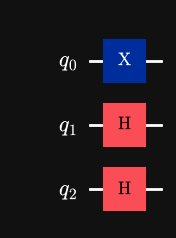

In [162]:
ansatz = QuantumCircuit(3)


ansatz.x(0)
ansatz.h(1)
ansatz.h(2)
#ansatz.RZGate(np.pi/2)


#### 


ansatz.draw('mpl', style = my_style)

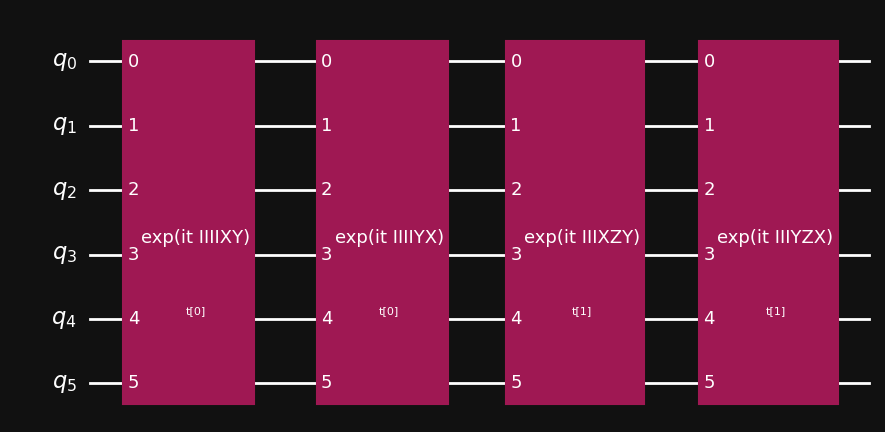

In [91]:
qubit_mapper = JordanWignerMapper()
ucc = UCC(3, (1,0), 's', qubit_mapper,beta_spin=False)
ucc.decompose().decompose().draw("mpl", style = my_style)

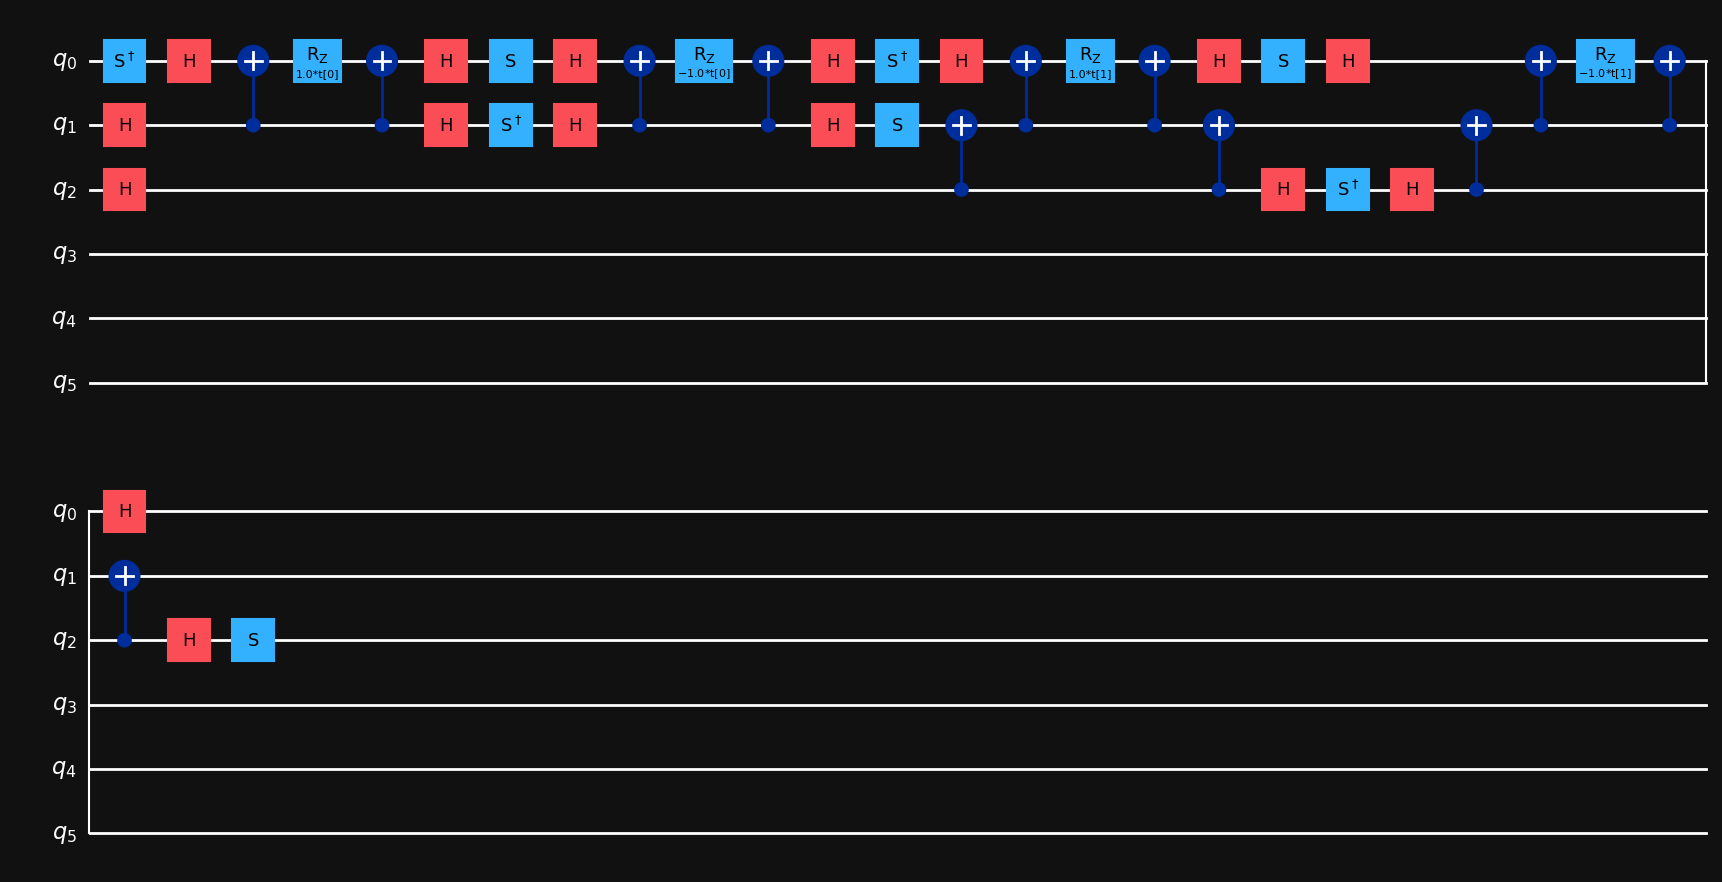

In [92]:
ucc.decompose().decompose().decompose().draw("mpl", style = my_style)

In [ ]:
hamiltonian = SparsePauliOp(["IXY", "IYX"])

state = QuantumCircuit(3)
#state.h(1)

evolution = PauliEvolutionGate(hamiltonian, time=1)

# evolve state by appending the evolution gate
state.append(evolution)

state.draw('mpl')

In [ ]:
hamiltonian = SparsePauliOp(["ZZI", "IZZ"])

# prepare an initial state with a Hamadard on the middle qubit
state = QuantumCircuit(3)
state.h(1)

evolution = PauliEvolutionGate(hamiltonian, time=1)

# evolve state by appending the evolution gate
state.append(evolution)

state.draw('mpl')

In [36]:
state.draw()

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘
q_2: ─────

In [32]:
hamiltonian = SparsePauliOp(["IXY", "IYX"])

evolution = PauliEvolutionGate(hamiltonian, time=1)
evolution

Instruction(name='PauliEvolution', num_qubits=3, num_clbits=0, params=[1.0])

In [ ]:
from qiskit.circuit.library import PauliEvolutionGate

evolution = PauliEvolutionGate(exp1, time=1)

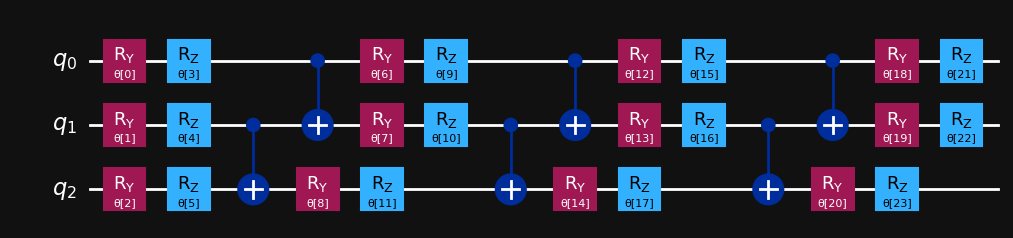

In [20]:
from qiskit.circuit.library import EfficientSU2

circ = EfficientSU2(3)
circ.decompose().draw("mpl", style = my_style)

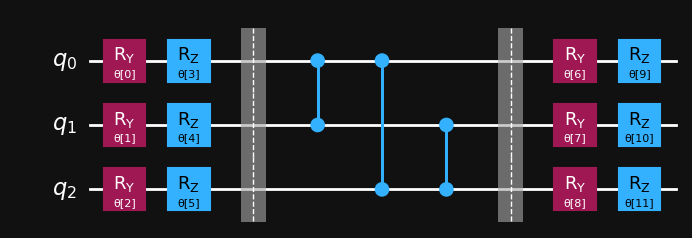

In [21]:
from qiskit.circuit.library import TwoLocal

num_qubits = 3
rotation_blocks = ['ry','rz']
entanglement_blocks = 'cz'
entanglement = 'full'

ansatz = TwoLocal(num_qubits, rotation_blocks, entanglement_blocks, entanglement, reps=1, insert_barriers=True)
num_params = ansatz.num_parameters

ansatz.decompose().draw('mpl', style = my_style)

### Extra LaTeX



$$\psi_{n l m}(r,\theta,\phi)=N\left(\frac{r}{b}\right)^{l}L_{n}^{l+1/2}(\frac{r}{b})e x p\left(-\frac{r^{2}}{2b^{2}}\right)Y_{l m}(\theta,\phi)$$
$$ |N|^{2}=\frac{2\alpha^{3}n!}{\sqrt{\pi}}\frac{2^{(2(n+l)+1)}}{(2n+2l+1)!}(n+l)!$$



VQE Článek:
$$ \langle r|n\rangle=(-1)^{n}{\sqrt{{\frac{2n!}{b^{3}\,\Gamma(n+3/2)}}}}\exp\biggl(-{\frac{r^{2}}{2b^{2}}}\biggr)\,L_{n}^{1/2}\biggl({\frac{r^{2}}{b^{2}}}\biggr)\,, $$

Tahák:

$$\psi_{n,l,m}(\xi,\theta,\varphi)=R_{n,l}(\xi)~Y_{l m}(\theta,\varphi)$$
$$ R_{n,l}(\xi)=K_{n l}\;\xi^{l}\;e^{-\frac{\xi^{2}}2\;}\;L_{n}^{l+\frac{1}{2}}(\xi^{2}) $$
$$ \xi=r\sqrt{\frac{M\omega}{\hbar}},\ \ \ K_{n l}=\frac{2}{\pi^{\frac{1}{4}}}\left(\frac{M\omega}{\hbar}\right)^{\frac{3}{4}}\left(\frac{2^{n+l}n!}{(2n+2l+1)!!}\right)^{\frac{1}{2}} $$
$$L_{n}^{\beta}(z)={\frac{1}{n!}}\;e^{z}z^{-\beta}\;{\frac{d^{n}}{d z^{n}}}\;\left(e^{-z}z^{n+\beta}\right)$$
$$ {L}_{0}^{\beta}(z)=1,\ {L}_{1}^{\beta}(z)=1+\beta-z $$

Kulové funkce:
$$ Y_{l m}(\theta,\varphi)=C_{l m}\;P_{l}^{m}(\cos\theta)\;e^{i m\varphi}, $$
kde $P_l^m$ jsou přidružené Legenderovy polynomy. Pro $l=0$ (a tudíž $m=0$) však platí:
$$ Y_{00}(\theta,\varphi)=\frac{1}{\sqrt{4\pi}} $$